# Extraction des polygones des communes de la région AURA

## Objectifs

Pour faire des cartes on va avoir besoin du tracé des différentes entités administratives. Je commence avec les communes, à partir des premières données que j'ai trouvé (voir paragraphe `instructions` ci-dessous). Ce notebook ouvre le shapefile, le filtre selon le code insee et en réécrit un qui (normalement!) ne contient que les données qui nous intéressent, simplifiées de sorte à convenir à un site web.

Je ne vais pas stocker le résultat sur git, mais plutôt sur l'espace de partage de fichiers. Si vous n'y avez pas accès (ou que je zappe) il faudra refaire la manip. 


## Bilan

Les données sont assez récentes (2022), néanmoins le compte des communes diffère un peu de celui du fichier DATA.xlsx à date (4029 vs 4040 respectivement). Peut être que les arrondissements de Lyon ne sont pas détaillés. À creuser.

## Instructions

Pour exécuter ce notebook, télécharger [ces données](https://www.data.gouv.fr/fr/datasets/r/607baf61-5828-452b-b0f8-0dd125a6a7f2) ([source](https://www.data.gouv.fr/fr/datasets/kml-des-communes-y-compris-dom-tom/)), les extraire et placer le dossier dans `../data/`. Si c'est pas bon, la première cellule après les imports python va planter.

## Notes

Pour simplifier l'implémentation de l'outil, j'ai renommé la colonnes "insee" du shapefile des communes "code_territoire" (colonne adéquate de DATA.xlsx)

In [1]:
import geopandas as gpd
import pandas as pd
import topojson as tp
import json
import re

In [2]:
communes_fr = gpd.read_file("../data/communes-20220101-shp/communes-20220101.shp")

In [3]:
# Communes à extraire = celles dont le code insee commence par ces numéros
# (https://fr.wikipedia.org/wiki/Auvergne-Rh%C3%B4ne-Alpes):
#   01 (Ain), 03 (Allier), 07 (Ardèche), 15 (Cantal), 26 (Drôme),
#   38 (Isère), 42 (Loire), 43 (Haute-Loire), 63 (Puy-de-Dôme), 69 (Rhône),
#   73 (Savoie ), 74 (Haute-Savoie)

in_AURA = [ i for i in range(len(communes_fr))
               if re.match("(01|03|07|15|26|38|42|43|63|69|73|74)[0-9]{3}", communes_fr.iloc[i].insee) ]

In [4]:
communes_aura = communes_fr.iloc[in_AURA]

In [5]:
communes_aura.plot()

<AxesSubplot:>

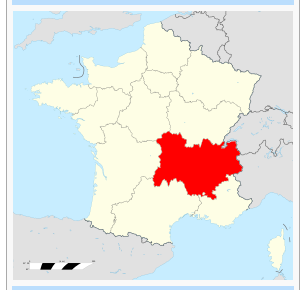

=> looks good !

In [6]:
# désolé si certains travaillent sur windows pas sûr que cette commande là 
# fonctionne...
! mkdir -p ../data/communes_aura

In [7]:
topo = tp.Topology(communes_aura.to_crs(4326), prequantize=False)
communes_aura_simple = topo.toposimplify(0.01).to_gdf()
communes_aura_simple = communes_aura_simple.rename(columns={"insee": "code_territoire"})
communes_aura_simple = communes_aura_simple.drop(columns=["wikipedia", "surf_ha"])
communes_aura_simple.to_file("../data/communes_aura.geojson")

/home/thomas/.local/lib/python3.10/site-packages/topojson/core/dedup.py:107: RuntimeWarning: invalid value encountered in cast
  data["bookkeeping_shared_arcs"] = array_bk_sarcs.astype(np.int64).tolist()


In [8]:
communes_aura_simple.plot()

<AxesSubplot:>